VIII Auswertung
===

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from numpy import exp, sqrt, log
from scipy.optimize import curve_fit
from scipy.optimize import curve_fit
from scipy.stats import chi2
import scipy.integrate as integrate

VIII.1/2 Importieren und graphische Darstellung + Fit
---

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:33: RuntimeWarning: invalid value encountered in power


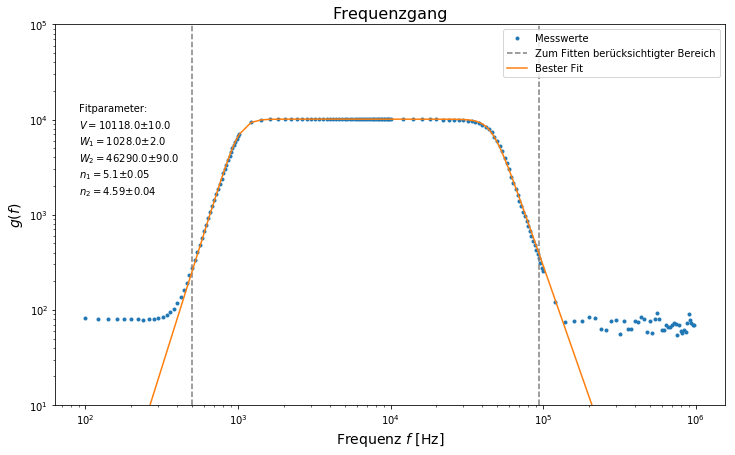

In [2]:
# Importieren der Daten
f, U_aus = np.loadtxt('data/243/A3.txt', skiprows = 1, usecols = (0,1), 
                     unpack=True) #  in Hz, U_aus in mV
U_aus = U_aus * 1e-3 # V

# Konstanten und Bestimmung des Frequenzgangs
D = 1e-3
sig_D = 0.002 * D
U_ein = 0.2 # Vrms
sig_U_ein = 0.03 * U_ein
sig_U_aus = 0.03 * U_aus
g = U_aus / (U_ein * D)
sig_g = g * sqrt((sig_U_aus / U_aus) ** 2 + (sig_D / D) ** 2 
                 + (sig_U_ein / U_ein) ** 2)

# Plot

xmin = 20
xmax = -48

plt.figure(figsize = (12,7))
plt.loglog(f, g, linestyle = 'None', marker='.', label = 'Messwerte') 
plt.title('Frequenzgang', size = 16)
plt.xlabel('Frequenz $f$ [Hz]', size = 14) 
plt.ylabel('$g(f)$', size = 14)
plt.axvline(f[xmin], ls = '--', color = 'gray')
plt.axvline(f[xmax], ls = '--', color = 'gray', 
            label = 'Zum Fitten berücksichtigter Bereich')
plt.ylim(1e1, 1e5)

# Fit
def fit_func(f,V,W1,W2,n1,n2):
    return V / (sqrt(1 + 1 / (f / W1) ** (2 * n1)) * sqrt(1 + (f / W2) ** (2 * n2)))


p0 = [1000, 1000, 50000, 5, 5]
popt, pcov = curve_fit(fit_func, f[xmin:xmax], g[xmin:xmax], p0)

# Ergebnisse des Fits
V = popt[0] # Verstärkung 10 Mal grösser als erwartet
sig_V = sqrt(pcov[0,0])
W1 = popt[1]
sig_W1 = sqrt(pcov[1,1])
W2 = popt[2]
sig_W2 = sqrt(pcov[2,2])
n1 = popt[3]
sig_n1 = sqrt(pcov[3,3])
n2 = popt[4]
sig_n2 = sqrt(pcov[4,4])

plt.loglog(f, fit_func(f, *popt), label = 'Bester Fit')
plt.text(exp(4.5), exp(9.4), 'Fitparameter:')
plt.text(exp(4.5), exp(9), '$V =$' + str(np.round(V, 0)) + '$\pm$' 
         + str(np.round(sig_V, 0)))
plt.text(exp(4.5), exp(8.6), '$W_1 =$' + str(np.round(W1, 0)) + '$\pm$'
        + str(np.round(sig_W1, 0)))
plt.text(exp(4.5), exp(8.2), '$W_2 =$' + str(np.round(W2, -1)) + '$\pm$'
        + str(np.round(sig_W2, -1)))
plt.text(exp(4.5), exp(7.8), '$n_1 =$' + str(np.round(n1, 2)) + '$\pm$'
        + str(np.round(sig_n1, 2)))
plt.text(exp(4.5), exp(7.4), '$n_2 =$' + str(np.round(n2, 2)) + '$\pm$'
        + str(np.round(sig_n2, 2)))

plt.legend(loc = 'upper right')
plt.savefig('images/243/V243Diagramm1.png')
plt.show()

In [3]:
# Güte des Fits
chi2_= np.sum((fit_func(f[xmin:xmax], *popt) - g[xmin:xmax]) ** 2 / sig_g[xmin:xmax] ** 2) 
dof = len(sig_g[xmin:xmax]) - 1 #dof:degrees of freedom, Freiheitsgrad 
chi2_red = chi2_/dof

print("chi2 =", chi2_)
print("chi2_red =",chi2_red)

prob = np.round(1 - chi2.cdf(chi2_,dof),2) * 100 
print("Wahrscheinlichkeit =", prob, "%")

chi2 = 83.86209407197536
chi2_red = 0.7487686970712086
Wahrscheinlichkeit = 98.0 %


VIII.3 Numerische Integration
---

In [4]:
# Numerische Integration
def fit_func_square(f,V,W1,W2,n1,n2): 
    return fit_func(f,V,W1,W2,n1,n2) ** 2


B = integrate.quad(fit_func_square, f[xmin], f[xmax], args = tuple(popt)) # Hz
print('Das Integral beträgt: {value:.4e}'.format(value = B[0]))

Das Integral beträgt: 4.7245e+12


VIII.4 Bestimmung der Boltzmann-Konstante
---

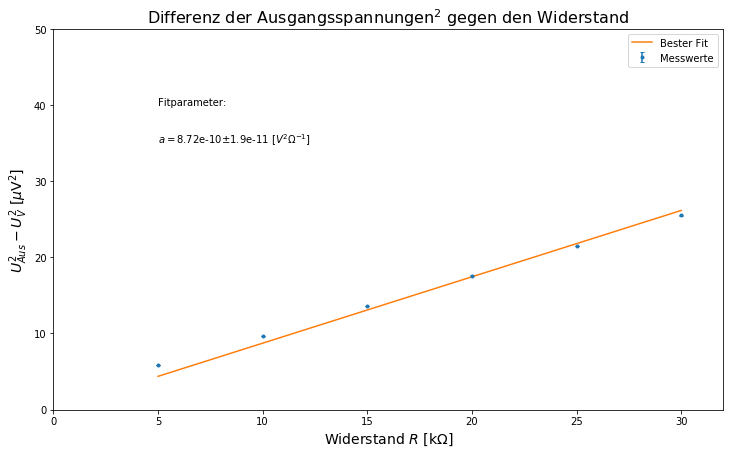

In [5]:
# Messwerte
R = np.array([5e3 , 10e3 , 15e3 , 20e3 , 25e3 , 30e3]) # kOhm
sig_R = R * 0.05
U_aus = np.array([2.425, 3.1066, 3.6881, 4.1954, 4.6338, 5.0493]) * 1e-3 # V
sig_U_aus = np.array([0.00845, 0.0116, 0.014, 0.0149, 0.019, 0.0199]) * 1e-3
N = np.array([102, 103, 99, 101, 111, 101]) # Anzahl Messungen
err_U_aus = sig_U_aus / sqrt(N)

U_V = 0.00587 * 1e-3 # V
sig_U_V = 0.00025 * 1e-3
N_V = 103
err_U_V = sig_U_V / sqrt(N_V)

# Differenz U_R^2 - U_V^2
D_U = U_aus ** 2 - U_V ** 2
sig_D = sqrt((err_U_aus * 2 * U_aus) ** 2 + (err_U_V * 2 * U_V) ** 2)

# Plot
plt.figure(figsize = (12,7))
plt.errorbar(R, D_U, yerr = sig_D, fmt = '.', capsize = 2, label = 'Messwerte')
plt.axis([0,3.2e4,0,.5e-4])
plt.title('Differenz der Ausgangsspannungen$^2$ gegen den Widerstand', size = 16)
plt.xlabel('Widerstand $R$ [k$\\Omega$]', size = 14)
plt.xticks([0, 5e3, 10e3, 15e3, 20e3, 25e3, 30e3],
          [0, 5, 10, 15, 20, 25, 30])
plt.ylabel('$U_{{Aus}}^2 - U_V^2$ [$\\mu$V$^2$]', size = 14)
plt.yticks([0, 0.00001, 0.00002, 0.00003, 0.00004, 0.00005],
          [0, 10, 20, 30, 40, 50])

# Fit
def line(x, a):
    return a * x

popt, pcov = curve_fit(line, R, D_U)

# Fitergebnisse
a = popt[0] # V^2 Ohm^-1
sig_a = sqrt(pcov[0,0])

plt.plot(R, line(R, *popt), label = 'Bester Fit')
plt.text(5e3, 4e-5, 'Fitparameter:')
plt.text(5e3, 3.5e-5, '$a =$' + str(np.round(a, 12)) + '$\pm$' 
         + str(np.round(sig_a, 12)) + ' [$V^2 \\Omega^{-1}$]')

plt.legend(loc = 'best')
plt.savefig('images/243/V243Diagramm2.png')
plt.show()

In [6]:
# Güte des Fits
chi2_= np.sum((line(R, *popt) - D_U) ** 2 / sig_D ** 2) 
dof = len(D_U) - 1 #dof:degrees of freedom, Freiheitsgrad 
chi2_red = chi2_/dof

print("chi2 =", chi2_)
print("chi2_red =",chi2_red)

prob = np.round(1 - chi2.cdf(chi2_,dof), 2) * 100 
print("Wahrscheinlichkeit =", prob, "%")

chi2 = 161888.32011063426
chi2_red = 32377.664022126854
Wahrscheinlichkeit = 0.0 %


In [7]:
# Theorie: a = 4 k T B
# Messungen:
T = 273.15+22.2 # K
sig_T = 0.2
a = popt[0]
sig_a = sqrt(pcov[0,0])

kB = a / (4 * T * B[0]) * 1e25 # 10*-25 V^2 Ohm^-1 K^-1 Hz^-1 = m^2 kg s^-2 K^-1
sig_kB = kB * sqrt((pcov[0,0] ** 0.5 / popt[0]) ** 2 + (sig_T / T) ** 2)
sys_kB = kB * 0.02
print('Boltzmann Konstante: k_B =', '(', np.round(kB,2), '+/-', 
      np.round(sig_kB,2), 'stat. +/-', np.round(sys_kB, 2), 'syst. ) * 1e-25 J K^-1')

Boltzmann Konstante: k_B = ( 1.56 +/- 0.03 stat. +/- 0.03 syst. ) * 1e-25 J K^-1
